<a href="https://colab.research.google.com/github/khanhpt74/-n-/blob/main/trainyolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BpObbzpSvGtIRLqHxbO9")
project = rf.workspace("khanh-9xl0j").project("phuong_tien")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.12, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to phuong_tien-1 in yolov8:: 100%|██████████| 620/620 [00:00<00:00, 4759.96it/s]


In [ ]:
# Check GPU is working or not
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Using torch 2.2.1+cu121 (Tesla T4)


In [ ]:
from ultralytics import YOLO
import os
os.environ["WANDB_DISABLED"] = "true"
# load pre-trained modelyolo9c. pt
detection_model = YOLO("yolov8m.pt") #

100%|██████████| 49.7M/49.7M [00:00<00:00, 162MB/s]


In [ ]:
model = YOLO("yolov8m.pt")

model.train(data='/content/phuong_tien-1/data.yaml', epochs=10)

Ultralytics YOLOv8.2.12 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/phuong_tien-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 27.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 114MB/s]


AMP: checks passed ✅


train: Scanning /content/phuong_tien-1/train/labels... 212 images, 1 backgrounds, 0 corrupt: 100%|██████████| 212/212 [00:00<00:00, 1562.94it/s]

train: New cache created: /content/phuong_tien-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/phuong_tien-1/valid/labels... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<00:00, 880.13it/s]

val: New cache created: /content/phuong_tien-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       7.3G      1.964      2.936      1.281         54        640: 100%|██████████| 14/14 [00:19<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all         62       1149      0.798      0.298      0.306      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.11G       1.82       1.22      1.217         18        640: 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]

                   all         62       1149      0.664      0.403      0.422      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.24G      1.756     0.9798       1.19         58        640: 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         62       1149      0.597      0.479       0.51      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.26G      1.788     0.9605      1.233         24        640: 100%|██████████| 14/14 [00:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         62       1149      0.404      0.426      0.336       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.23G      1.708     0.8811      1.177        137        640: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         62       1149      0.412      0.496      0.494      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.28G      1.744     0.9277      1.155        100        640: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         62       1149       0.54      0.562      0.523      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       7.2G      1.688     0.9627      1.151         24        640: 100%|██████████| 14/14 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         62       1149      0.671      0.512      0.534      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.25G      1.618     0.7844      1.127         95        640: 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         62       1149       0.66      0.623      0.611      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.11G      1.626     0.7686      1.113        105        640: 100%|██████████| 14/14 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         62       1149      0.693      0.698      0.678      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.28G      1.611      0.747      1.125         70        640: 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         62       1149      0.726      0.681      0.692      0.316



10 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.12 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


                   all         62       1149      0.726      0.677      0.693      0.317
                xe-oto         62       1107      0.777      0.762      0.824       0.41
                xe_may         62         42      0.675      0.593      0.561      0.224
Speed: 0.3ms preprocess, 12.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x793040d771c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install


0: 384x640 1 person, 12 cars, 4 motorcycles, 1 truck, 26.6ms
Speed: 3.1ms preprocess, 26.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


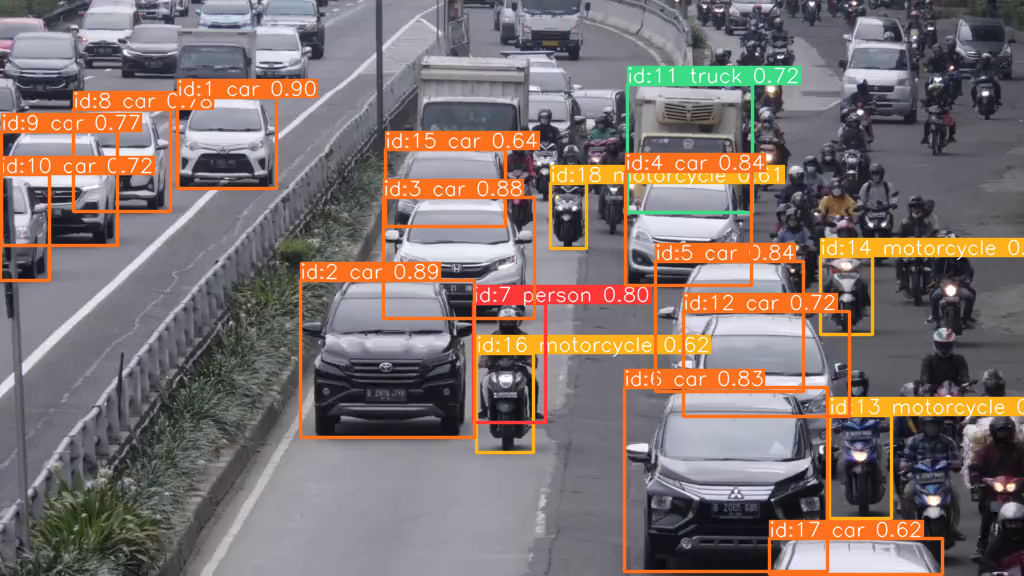

error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLOv8 model
model = YOLO('yolov8m.pt')

# Open the video file
video_path = "/content/video.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame using cv2_imshow
        cv2_imshow(annotated_frame)

        # Check if the user pressed 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()



In [ ]:
import cv2
from ultralytics import YOLO
from IPython.display import display, HTML

# Load the YOLOv8 model
model = YOLO('yolov8m.pt')

# Open the video file
video_path = "/content/video.mp4"
cap = cv2.VideoCapture(video_path)

# Get the video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (frame_width, frame_height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Write the frame to the output video file
        out.write(annotated_frame)

        # Check if the user pressed 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release the video capture object and close the VideoWriter
cap.release()
out.release()

# Display the output video file
display(HTML("""
<video width="640" height="384" controls>
  <source src="/content/output_video.mp4" type="video/mp4">
</video>
"""))



ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
# Validate the model
metrics = model.val()

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/model-trafic-1/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:11<00:00,  1.08s/it]


                   all        173       1521      0.917      0.916      0.961      0.593
                xe may        173        979      0.908       0.89      0.948      0.527
                xe oto        173        542      0.926      0.943      0.974      0.659
Speed: 0.6ms preprocess, 23.8ms inference, 0.1ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train32


In [ ]:
import shutil

# Replace 'path/to/resized_folder' with the actual path to your resized folder
folder_path = '/content/runs/detect/train'
zip_filename = 'yolov8_result'

shutil.make_archive(zip_filename, 'zip', folder_path)


# Replace 'path/to/zip/file' with the path where you want to save the zip file in Google Drive
drive_folder_path = '/content/drive/MyDrive/DO_AN_2'

shutil.move(zip_filename + '.zip', drive_folder_path)

'/content/drive/MyDrive/DO_AN_2/yolov8_result.zip'